In [18]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
pip install geopandas

In [0]:
import geopandas as gpd

In [0]:
import plotly.graph_objects as go
import pandas as pd
import requests
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon
from datetime import datetime
from plotly.subplots import make_subplots
%matplotlib inline

In [0]:
raw= requests.get("http://covid19-india-adhikansh.herokuapp.com/states")
raw_json = raw.json()
df = pd.DataFrame(raw_json["state"])

In [10]:
df.head()

,_id,name,confirmed,cured,death,total
0,5ed0a190956123b324f035c8,Andaman and Nicobar Islands,33,33,0,66
1,5ed0a190956123b324f035c9,Andhra Pradesh,3251,2125,59,5435
2,5ed0a190956123b324f035ca,Arunachal Pradesh,3,1,0,4
3,5ed0a190956123b324f035cb,Assam,856,104,4,964
4,5ed0a191956123b324f035cc,Bihar,3296,1211,15,4522


In [11]:
df.set_index("_id")

,name,confirmed,cured,death,total
_id,,,,,
5ed0a190956123b324f035c8,Andaman and Nicobar Islands,33,33,0,66
5ed0a190956123b324f035c9,Andhra Pradesh,3251,2125,59,5435
5ed0a190956123b324f035ca,Arunachal Pradesh,3,1,0,4
5ed0a190956123b324f035cb,Assam,856,104,4,964
5ed0a191956123b324f035cc,Bihar,3296,1211,15,4522
5ed0a191956123b324f035cd,Chandigarh,288,189,4,481
5ed0a191956123b324f035ce,Chhattisgarh,399,83,0,482
5ed0a192956123b324f035cf,Dadar Nagar Haveli,2,0,0,2
5ed0a192956123b324f035d0,Delhi,16281,7495,316,24092


In [0]:
df=df[["name","confirmed","death","cured"]]

In [27]:
df

,name,confirmed,death,cured,text
0,Andaman and Nicobar Islands,33,0,33,Andaman and Nicobar Islands<br>Confirmed: 33<b...
1,Andhra Pradesh,3251,59,2125,Andhra Pradesh<br>Confirmed: 3251<br>Deaths: 5...
2,Arunachal Pradesh,3,0,1,Arunachal Pradesh<br>Confirmed: 3<br>Deaths: 0...
3,Assam,856,4,104,Assam<br>Confirmed: 856<br>Deaths: 4<br>Recove...
4,Bihar,3296,15,1211,Bihar<br>Confirmed: 3296<br>Deaths: 15<br>Reco...
5,Chandigarh,288,4,189,Chandigarh<br>Confirmed: 288<br>Deaths: 4<br>R...
6,Chhattisgarh,399,0,83,Chhattisgarh<br>Confirmed: 399<br>Deaths: 0<br...
7,Dadar Nagar Haveli,2,0,0,Dadar Nagar Haveli<br>Confirmed: 2<br>Deaths: ...
8,Delhi,16281,316,7495,Delhi<br>Confirmed: 16281<br>Deaths: 316<br>Re...
9,Goa,69,0,38,Goa<br>Confirmed: 69<br>Deaths: 0<br>Recovered...


In [0]:
total_confirmed = df["confirmed"].sum()
total_recovered = df["cured"].sum()
total_deaths = df["death"].sum()

In [0]:
df_top10 = df.nlargest(5, "confirmed")
top10_countries_1 = df_top10["name"].tolist()
top10_confirmed = df_top10["confirmed"].tolist()

df_top10 = df.nlargest(5, "death")
top10_countries_2 = df_top10["name"].tolist()
top10_recovered = df_top10["death"].tolist()

df_top10 = df.nlargest(5, "cured")
top10_countries_3 = df_top10["name"].tolist()
top10_deaths = df_top10["cured"].tolist()

In [0]:
message = df["name"]+ "<br>"
message += "Confirmed: " + df["confirmed"].astype(str) + "<br>"
message += "Deaths: " + df["death"].astype(str) + "<br>"
message += "Recovered: " + df["cured"].astype(str) + "<br>"
df["text"] = message

In [28]:
fp = "Indian_States.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [0]:
map_df["st_nm"].replace({"Dadara & Nagar Havelli": "Dadar Nagar Haveli", "Andaman & Nicobar Island": "Andaman and Nicobar Islands", "Arunanchal Pradesh": "Arunachal Pradesh","Jammu & Kashmir":"Jammu and Kashmir","NCT of Delhi":"Delhi","Telangana":"Telengana"}, inplace=True)

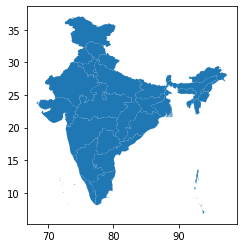

In [31]:
map_df.plot()

In [35]:

# join the geodataframe with the dataframe
merged = map_df.set_index('st_nm').join(df.set_index('name'))
#deleting states which are not present in either of the dataframes
merged.drop(['Lakshadweep', 'Daman & Diu'])

,geometry,confirmed,death,cured,text
st_nm,,,,,
Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",33.0,0.0,33.0,Andaman and Nicobar Islands<br>Confirmed: 33<b...
Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",3.0,0.0,1.0,Arunachal Pradesh<br>Confirmed: 3<br>Deaths: 0...
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",856.0,4.0,104.0,Assam<br>Confirmed: 856<br>Deaths: 4<br>Recove...
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",3296.0,15.0,1211.0,Bihar<br>Confirmed: 3296<br>Deaths: 15<br>Reco...
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",288.0,4.0,189.0,Chandigarh<br>Confirmed: 288<br>Deaths: 4<br>R...
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",399.0,0.0,83.0,Chhattisgarh<br>Confirmed: 399<br>Deaths: 0<br...
Dadar Nagar Haveli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",2.0,0.0,0.0,Dadar Nagar Haveli<br>Confirmed: 2<br>Deaths: ...
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",69.0,0.0,38.0,Goa<br>Confirmed: 69<br>Deaths: 0<br>Recovered...
Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",15562.0,960.0,8003.0,Gujarat<br>Confirmed: 15562<br>Deaths: 960<br>...


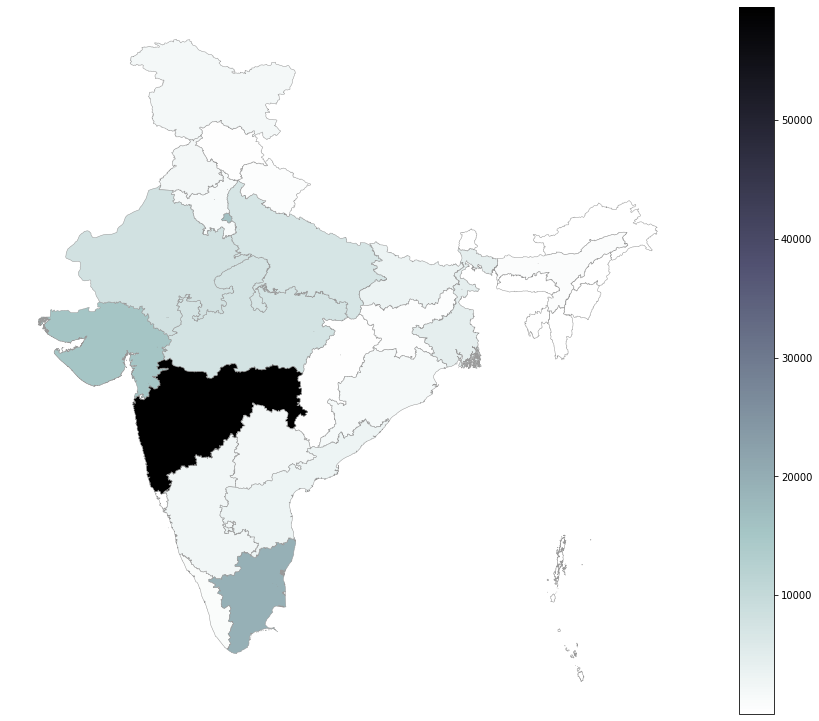

In [147]:
variable = 'confirmed'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1,figsize=(18, 13))
ax.axis('off')
merged.plot(column=variable, cmap='bone_r', linewidth=0.5, ax=ax, edgecolor='0.6', legend='True')


